In [2]:
import requests
import matplotlib.pyplot as plt
import urllib.request as url
import urllib.parse as urlparse
import time
import random
import json
import regex as re

In [3]:
from bs4 import BeautifulSoup

# Initializing API

In [4]:
YELP_TOKEN = "2CGqvoUHZhHXVgSi-92aLYIR8xKyK0xifVWmUsFkP02kWybe4obcNU_RK-o0ahD3uv96H5etXV5eYVG9tyqdVS_Xw13eykJSfHY3Fcz8iPXmif6jOg_8EvbpkoSNYXYx"

In [5]:
r = requests.get("https://api.yelp.com/v3/businesses/search?location=Toronto&limit=50", headers={"Authorization": "Bearer %s" % YELP_TOKEN})

In [6]:
print(r.status_code, r.reason, r.content)

200 OK b'{"businesses": [{"id": "r_BrIgzYcwo1NAuG9dLbpg", "alias": "pai-northern-thai-kitchen-toronto-5", "name": "Pai Northern Thai Kitchen", "image_url": "https://s3-media1.fl.yelpcdn.com/bphoto/cO0LcL_SGxZUYrqVeGPJOQ/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?adjust_creative=kFQkGSXn7H0xsmBoagrH2w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=kFQkGSXn7H0xsmBoagrH2w", "review_count": 2975, "categories": [{"alias": "thai", "title": "Thai"}], "rating": 4.5, "coordinates": {"latitude": 43.64784, "longitude": -79.38872}, "transactions": [], "price": "$$", "location": {"address1": "18 Duncan Street", "address2": "", "address3": "", "city": "Toronto", "zip_code": "M5H 3G8", "country": "CA", "state": "ON", "display_address": ["18 Duncan Street", "Toronto, ON M5H 3G8", "Canada"]}, "phone": "+14169014724", "display_phone": "+1 416-901-4724", "distance": 3009.3347434869856}, {"id": "iGEvDk6hsizigmXhDKs2Vg", "alias": 

In [7]:
r.json()

{'businesses': [{'alias': 'pai-northern-thai-kitchen-toronto-5',
   'categories': [{'alias': 'thai', 'title': 'Thai'}],
   'coordinates': {'latitude': 43.64784, 'longitude': -79.38872},
   'display_phone': '+1 416-901-4724',
   'distance': 3009.3347434869856,
   'id': 'r_BrIgzYcwo1NAuG9dLbpg',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/cO0LcL_SGxZUYrqVeGPJOQ/o.jpg',
   'is_closed': False,
   'location': {'address1': '18 Duncan Street',
    'address2': '',
    'address3': '',
    'city': 'Toronto',
    'country': 'CA',
    'display_address': ['18 Duncan Street', 'Toronto, ON M5H 3G8', 'Canada'],
    'state': 'ON',
    'zip_code': 'M5H 3G8'},
   'name': 'Pai Northern Thai Kitchen',
   'phone': '+14169014724',
   'price': '$$',
   'rating': 4.5,
   'review_count': 2975,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?adjust_creative=kFQkGSXn7H0xsmBoagrH2w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=kFQk

# Using Yelp's API to Retrieve URL's of Interest

In [8]:
data=r.json()
data

{'businesses': [{'alias': 'pai-northern-thai-kitchen-toronto-5',
   'categories': [{'alias': 'thai', 'title': 'Thai'}],
   'coordinates': {'latitude': 43.64784, 'longitude': -79.38872},
   'display_phone': '+1 416-901-4724',
   'distance': 3009.3347434869856,
   'id': 'r_BrIgzYcwo1NAuG9dLbpg',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/cO0LcL_SGxZUYrqVeGPJOQ/o.jpg',
   'is_closed': False,
   'location': {'address1': '18 Duncan Street',
    'address2': '',
    'address3': '',
    'city': 'Toronto',
    'country': 'CA',
    'display_address': ['18 Duncan Street', 'Toronto, ON M5H 3G8', 'Canada'],
    'state': 'ON',
    'zip_code': 'M5H 3G8'},
   'name': 'Pai Northern Thai Kitchen',
   'phone': '+14169014724',
   'price': '$$',
   'rating': 4.5,
   'review_count': 2975,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?adjust_creative=kFQkGSXn7H0xsmBoagrH2w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=kFQk

In [9]:
urllist=[]
for business in data['businesses']:
  url = business['url']
  urllist.append(url)
urllist

['https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?adjust_creative=kFQkGSXn7H0xsmBoagrH2w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=kFQkGSXn7H0xsmBoagrH2w',
 'https://www.yelp.com/biz/seven-lives-tacos-y-mariscos-toronto?adjust_creative=kFQkGSXn7H0xsmBoagrH2w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=kFQkGSXn7H0xsmBoagrH2w',
 'https://www.yelp.com/biz/kinka-izakaya-original-toronto?adjust_creative=kFQkGSXn7H0xsmBoagrH2w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=kFQkGSXn7H0xsmBoagrH2w',
 'https://www.yelp.com/biz/banh-mi-boys-toronto?adjust_creative=kFQkGSXn7H0xsmBoagrH2w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=kFQkGSXn7H0xsmBoagrH2w',
 'https://www.yelp.com/biz/richmond-station-toronto?adjust_creative=kFQkGSXn7H0xsmBoagrH2w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=kFQkGSXn7H0xsmBoagrH2w',
 'https://www.yelp.com/biz/byblos-toronto-2?a

# Using an HTML Parser to acquire reviews from all locations

In [12]:
reviews_with_rating=[]

for url in urllist:
    url_next = url
    pagenumber = 0 

    while pagenumber <= 50:
        html = requests.get(url_next).content
        soup = BeautifulSoup(html, 'html.parser')
        reviews = soup.find_all('div', {'class': " review__09f24__oHr9V border-color--default__09f24__NPAKY"})
        for review in reviews:
            body = review.find('p', {'class': 'comment__09f24__gu0rG css-1sufhje'}).find('span', {'class': ' raw__09f24__T4Ezm'}).text
            rating = review.find('div', {'class':re.compile(r'i-stars.+')}).get('aria-label')
            reviews_with_rating.append((body,rating))
        pagenumber += 10
        url_next = url + '&start=%s' % pagenumber 

In [21]:
reviews_with_rating

[('Pretty authentic thai food in Toronto! Some dishes are a little too salty (the Tom Yum was too salty for me), but everything was quite delicious. Pai is well known and has gained a lot of probability in recent years and now reservations are pretty difficult to make! Not sure if the food if worth the line-up, but it is delicious. There are just other thai restaurants in the city that are just as delicious with no line.',
  '4 star rating'),
 ('A quintessential Thai place in Toronto. Reliable service and food options, with ability to change the spice level and make you truly sweat. Good atmosphere to meet with friends or coworkers but always make a reservation because they are packed all the time!',
  '4 star rating'),
 ("Great food, good decoration, perfect place to have a chill dinner. I'd recommend getting their curry. The flavour is justtttt right.",
  '5 star rating'),
 ("An easy 4.5 stars. One of the best Thai restaurants I've been to outside of Thailand.We sampled the Green Cur

#Convert Results to JSON

In [22]:
with open('data.json', 'w') as file:
  json.dump(list(map(list, {x: 'Positive' if int(y[0]) > 3 else 'Negative' for (x, y) in reviews_with_rating}.items())), file)

# Creating a Machine Learning Model

In [24]:
review_features = [(x.split(' '), 'positive' if int(y[0]) > 3 else 'negative') for (x, y) in reviews_with_rating]
review_features

[(['Pretty',
   'authentic',
   'thai',
   'food',
   'in',
   'Toronto!',
   'Some',
   'dishes',
   'are',
   'a',
   'little',
   'too',
   'salty',
   '(the',
   'Tom',
   'Yum',
   'was',
   'too',
   'salty',
   'for',
   'me),',
   'but',
   'everything',
   'was',
   'quite',
   'delicious.',
   'Pai',
   'is',
   'well',
   'known',
   'and',
   'has',
   'gained',
   'a',
   'lot',
   'of',
   'probability',
   'in',
   'recent',
   'years',
   'and',
   'now',
   'reservations',
   'are',
   'pretty',
   'difficult',
   'to',
   'make!',
   'Not',
   'sure',
   'if',
   'the',
   'food',
   'if',
   'worth',
   'the',
   'line-up,',
   'but',
   'it',
   'is',
   'delicious.',
   'There',
   'are',
   'just',
   'other',
   'thai',
   'restaurants',
   'in',
   'the',
   'city',
   'that',
   'are',
   'just',
   'as',
   'delicious',
   'with',
   'no',
   'line.'],
  'positive'),
 (['A',
   'quintessential',
   'Thai',
   'place',
   'in',
   'Toronto.',
   'Reliable',
   

In [27]:
from nltk.sentiment import SentimentAnalyzer
import nltk.sentiment.util
from nltk.classify import NaiveBayesClassifier

random.shuffle(review_features)
training_docs = review_features[:120]
test_docs = review_features[120:]

print("Training: %d, Testing: %d" % (len(training_docs), len(test_docs)))

sentim_analyzer = SentimentAnalyzer()

Training: 120, Testing: 2790


In [28]:
all_words_neg = sentim_analyzer.all_words([nltk.sentiment.util.mark_negation(doc) for doc in training_docs])
all_words_neg

['Flambé',
 'French',
 'Toast',
 'pretty',
 'much',
 'met',
 'eggspectations,',
 'but',
 'it',
 'was',
 'the',
 'service',
 'that',
 'exceeded',
 'them.',
 "(Don't",
 'worry,_NEG',
 'I_NEG',
 "won't_NEG",
 'repeat_NEG',
 'the_NEG',
 'pun)The_NEG',
 'folks_NEG',
 'working_NEG',
 'here_NEG',
 'wonderful!_NEG',
 'Service_NEG',
 'was_NEG',
 'quick_NEG',
 'and_NEG',
 'attentive._NEG',
 'When_NEG',
 'my_NEG',
 'coffee_NEG',
 'was_NEG',
 'accidentally_NEG',
 'taken_NEG',
 'while_NEG',
 'washing_NEG',
 'my_NEG',
 'hands,_NEG',
 'the_NEG',
 'problem_NEG',
 'was_NEG',
 'rectified_NEG',
 'as_NEG',
 'soon_NEG',
 'as_NEG',
 "I'd_NEG",
 'sat_NEG',
 'down._NEG',
 'The_NEG',
 'French_NEG',
 'Toast_NEG',
 'had_NEG',
 'great_NEG',
 'overall_NEG',
 'flavor,_NEG',
 'and_NEG',
 'I_NEG',
 'could_NEG',
 'taste_NEG',
 'just_NEG',
 'a_NEG',
 'little_NEG',
 'bit_NEG',
 'of_NEG',
 'orange_NEG',
 'from_NEG',
 'the_NEG',
 'flambé._NEG',
 'However,_NEG',
 'it_NEG',
 'was_NEG',
 'also_NEG',
 'liberally_NEG',
 'coate

In [29]:
unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)
sentim_analyzer.add_feat_extractor(nltk.sentiment.util.extract_unigram_feats, unigrams=unigram_feats)

In [30]:
training_set = sentim_analyzer.apply_features(training_docs)
test_set = sentim_analyzer.apply_features(test_docs)

In [31]:
trainer = NaiveBayesClassifier.train
classifier = sentim_analyzer.train(trainer, training_set)
for key,value in sorted(sentim_analyzer.evaluate(test_set).items()):
     print('{0}: {1}'.format(key, value))

Training classifier
Evaluating NaiveBayesClassifier results...
Accuracy: 0.8186379928315413
F-measure [negative]: 0.16501650165016502
F-measure [positive]: 0.8982710092480901
Precision [negative]: 0.29069767441860467
Precision [positive]: 0.8533231474407945
Recall [negative]: 0.1152073732718894
Recall [positive]: 0.9482173174872666


<BarContainer object of 2 artists>

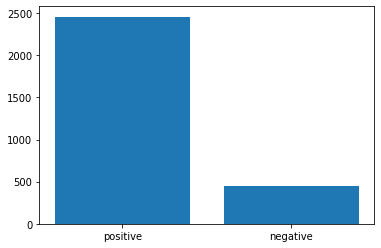

In [34]:
from collections import defaultdict

c = defaultdict(int)
for x in review_features:
    c[x[1]] += 1

plt.bar(c.keys(), c.values())

With an accuracy of 82%, there is definitely still room for impovement in increasing the ratio of negative to positive ratios procurred. However 82% is definitely not bad!